In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy.stats import multivariate_normal


In [6]:
path = 'Q6_Dataset/Images/'
images = os.listdir(path)

print(images)

['m38.jpg', 'c60.jpg', 'c47.jpg', 'c57.jpg', 'm62.jpg', 'm27.jpg', 'c56.jpg', 'c33.jpg', 'images.jpg', 'c1.jpg', 'm23.jpg', 'c49.jpg', 'm33.jpg', 'index.jpg', 'c52.jpg', 'c59.jpg', 'c35.jpg', 'c23.jpg', 'c28.jpg', 'c45.jpg', 'm46.jpg', 'm17.jpg', 'm11.jpg', 'm53.jpg', 'c51.jpg', 'c16.jpg', 'm19.jpg', 'c20.jpg', 'c29.jpg', 'c6.jpg', 'm18.jpg', 'm31.jpg', 'm45.jpg', 'ManUtd-508878051576073641743_medium.jpg', 'm40.jpg', 'c22.jpg', 'c11.jpg', 'm15.jpg', 'm9.jpg', 'c65.jpg', 'c64.jpg', 'm25.jpg', 'c32.jpg', 'c7.jpg', 'm26.jpg', 'c48.jpg', 'm63.jpg', 'c40.jpg', 'm21.jpg', 'm34.jpg', 'c8.jpg', 'c39.jpg', 'm12.jpg', 'm50.jpg', 'm4.jpg', 'm44.jpg', '1.jpg', 'm14.jpg', 'm48.jpg', 'c13.jpg', 'm3.jpg', 'c4.jpg', 'c9.jpg', 'c15.jpg', 'c10.jpg', 'm42.jpg', 'c17.jpg', 'm56.jpg', 'c27.jpg', 'm54.jpg', 'c31.jpg', 'c21.jpg', 'm59.jpg', 'm13.jpg', 'm58.jpg', 'c37.jpg', 'm24.jpg', 'c46.jpg', 'm2.jpg', 'm57.jpg', 'm55.jpg', 'c18.jpg', 'm51.jpg', 'c34.jpg', 'm61.jpg', 'c53.jpg', 'c36.jpg', 'c5.jpg', 'c24.jp

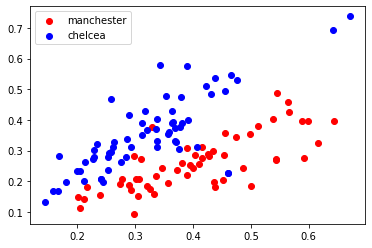

In [7]:
mans = []
chels = []

for img in images:
  temp = plt.imread(path + img)
  r_temp = temp[:, :, 0].mean() 
  b_temp = temp[:, :, 2].mean() 
  feat = np.array([r_temp, b_temp])

  if str.lower(img[0]) == 'm':
    mans.append(feat)

  elif str.lower(img[0]) == 'c':
    chels.append(feat)




mans = np.array(mans).astype('float') / 255.0
chels = np.array(chels).astype('float') / 255.0

plt.scatter(mans[:, 0], mans[:, 1], label='manchester', color='red')
plt.scatter(chels[:, 0], chels[:, 1], label='chelcea', color='blue')
plt.legend()
plt.show()


In [8]:
k = 2
us_m = np.random.normal(loc=0, scale=0.01, size=(k, 2))
us_c = np.random.normal(loc=0, scale=0.01, size=(k, 2))

sig_m = np.array([np.identity(2) for _ in range(k)])
sig_c = np.array([np.identity(2) for _ in range(k)])

alphas_m = np.ones(k) * (1/k)
alphas_c = np.ones(k) * (1/k)



In [9]:
def gmm_fit(data, alphas, us, sigs, k):
  prev_theta = np.concatenate((us.ravel(), sigs.ravel(), alphas.ravel()))

  while(True):
    norms = np.array([multivariate_normal.pdf(data, mean=us[t], cov=sigs[t]) for t in range(k)]).T
    denom = norms[:, np.newaxis, :].dot(alphas[:, np.newaxis]).squeeze()
    nom = np.multiply(np.repeat(alphas[np.newaxis, :], data.shape[0], axis=0), norms)
    p_j = nom / np.repeat(denom[:, np.newaxis], k, axis=1)
    alphas = p_j.mean(axis=0)
    
    denom = np.repeat(p_j.sum(axis = 0)[:, np.newaxis], 2, axis=1)
    temp = np.repeat(p_j[:, :, np.newaxis], 2, axis=2).transpose(1, 0, 2)
    nom = np.multiply(temp, data).sum(axis=1)
    us = np.divide(nom, denom)
    
    
    temp = np.repeat(us[np.newaxis, :, :], data.shape[0], axis=0).transpose(1, 0, 2)
    temp2 = np.repeat(data[np.newaxis, :, :], k, axis=0)

  

    diff = temp2 - temp 
    diff = np.matmul(diff[:, :, :, np.newaxis], diff[:, :, np.newaxis, :])
    temp3 = np.repeat(p_j.T[:, :, np.newaxis], 2, axis=2)
    temp3 = np.repeat(temp3[:, :, :, np.newaxis], 2, axis=3)
    nom = np.multiply(temp3, diff).sum(axis=1)
    temp4 = np.repeat(p_j.sum(axis=0)[:, np.newaxis], 2, axis=1)
    denom = np.repeat(temp4[:, :, np.newaxis], 2, axis=2)
    sigs = nom / denom
    
    
    theta = np.concatenate((us.ravel(), sigs.ravel(), alphas.ravel()))

    # print(np.linalg.norm(theta - prev_theta))
    

    if np.linalg.norm(theta - prev_theta) < 1e-7:
      break 
    
    prev_theta = theta

  return alphas, us, sigs



In [10]:
def p_gmm(x, alphas, us, sigmas, k):
  norms = np.array( [multivariate_normal.pdf(x, us[t], sigmas[t]) for t in range(k)] ).T
  res = np.multiply(np.repeat(alphas[np.newaxis, :], x.shape[0], axis=0), norms).sum(axis=1)
  return res 


In [11]:
def dec_bou(x, alphas, us, sigmas, alphas2, us2, sigmas2,  k):
  norms1 = np.array( [multivariate_normal.pdf(x, us[t], sigmas[t]) for t in range(k)] ).T
  norms2 = np.array( [multivariate_normal.pdf(x, us2[t], sigmas2[t]) for t in range(k)] ).T
  
  res1 = np.multiply(np.repeat(alphas[np.newaxis, :], x.shape[0], axis=0), norms1).sum(axis=1)
  res2 = np.multiply(np.repeat(alphas2[np.newaxis, :], x.shape[0], axis=0), norms2).sum(axis=1)

  return res2 - res1

In [12]:
def plot_contours(data, alphas, us, sigs, k, nx, ny, col, cntrs, fun, decision_b = False, data2=None, col2=None, alphas2=None, us2=None, sigs2=None):
  xs = np.linspace(0, 1, nx)
  ys = np.linspace(0, 1, ny)

  pln_x, pln_y = np.meshgrid(xs, ys)
  pln_x = pln_x.ravel()
  pln_y = pln_y.ravel()

  pln = np.hstack((pln_x[:, np.newaxis], pln_y[:, np.newaxis]))

  if decision_b == False:
    z = fun(pln, alphas, us, sigs, k)
  else:
    z = fun(pln, alphas, us, sigs, alphas2, us2, sigs2, k)

  z = z.reshape((nx, ny))
  pln_x = pln_x.reshape((nx, ny))
  pln_y = pln_y.reshape((nx, ny))

  fig, ax = plt.subplots()

  if decision_b == False:
    ax.contour(pln_x, pln_y, z, levels=cntrs)
    ax.scatter(data[:, 0], data[:, 1], color=col)
  else:
    ax.contour(pln_x, pln_y, z, levels=[0])
    ax.scatter(data[:, 0], data[:, 1], color=col)
    ax.scatter(data2[:, 0], data2[:, 1], color=col2)

  


In [13]:
        
alphas_m, us_m, sig_m = gmm_fit(mans, alphas_m, us_m, sig_m, k)
alphas_c, us_c, sig_c = gmm_fit(chels, alphas_c, us_c, sig_c, k)
      


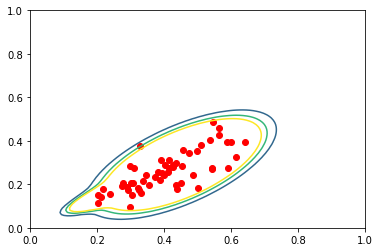

In [14]:
plot_contours(mans, alphas_m, us_m, sig_m, k, 100, 100, 'red', np.linspace(0, 1, 4), p_gmm)

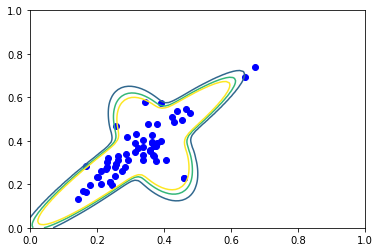

In [15]:
plot_contours(chels, alphas_c, us_c, sig_c, k, 100, 100, 'blue', np.linspace(0, 1, 4), p_gmm)

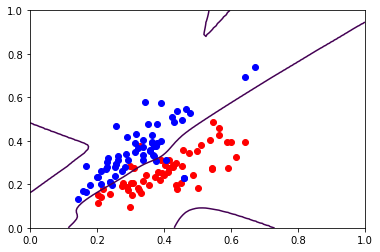

In [16]:
plot_contours(mans, alphas_m, us_m, sig_m, k, 100, 100, 'red', np.linspace(0, 1, 4), dec_bou, True, chels, 'blue', alphas_c, us_c, sig_c)
# def plot_contours(data, alphas, us, sigs, k, nx, ny, col, cntrs, fun, decision_b = False, data2=None, col2=None, alphas2=None, us2=None, sigs2=None):